## EXPLORATORY DATA ANALYSIS on the Titanic dataset


In [1]:
# import all packages that will be used on the EDA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Read the dataset and display first 5 rows
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Verify all the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Dealing with null values from Age and Embarked
# Also going to Drop 'Cabin', 'Name' and 'Ticket' as I believe these would not be important.

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace=True)

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [5]:
#checking again all the null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [6]:
# Checking type of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
# Changing Categorical values to numeric values on Sex column

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [8]:
# Chaning Categorical values to numeric values on Embarked column
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [9]:
# Double Checking type of data we have after all the changes made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


<Axes: xlabel='Sex', ylabel='Survived'>

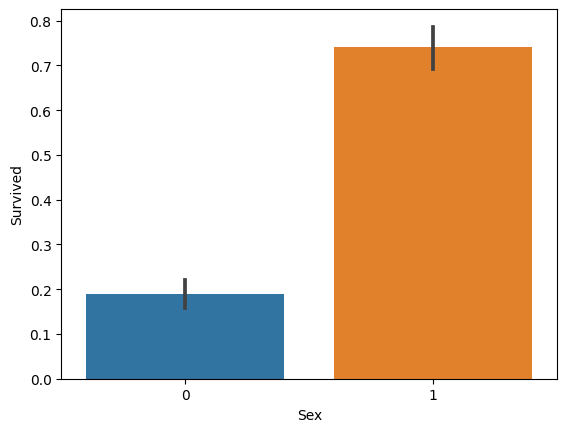

In [10]:
#Creating a barplot to vizualise the relation between Sex and Survival rate
sns.barplot(data = df, x='Sex', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

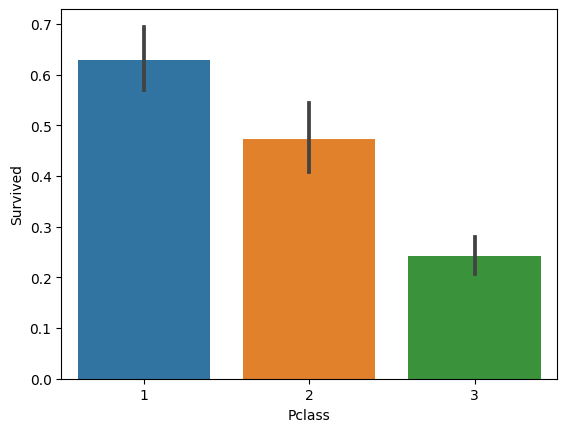

In [11]:
#Creating a barplot to vizualise the relation between Pclass and Survival rate

sns.barplot(data = df, x='Pclass', y='Survived')

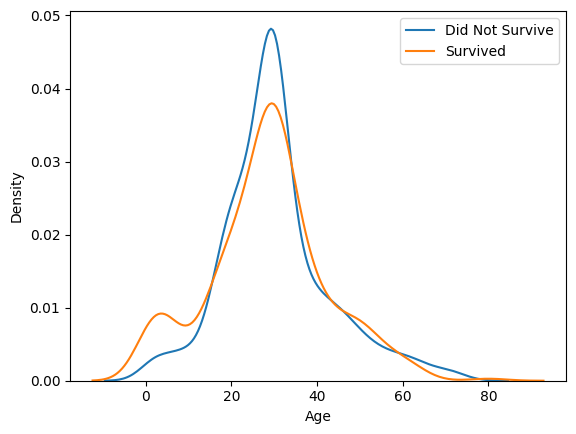

In [12]:
#Creating a KDEplot to vizualise the relation between Age and Survival rate

sns.kdeplot(df['Age'] [df['Survived'] == 0], label = 'Did Not Survive')
sns.kdeplot(df['Age'] [df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.legend()


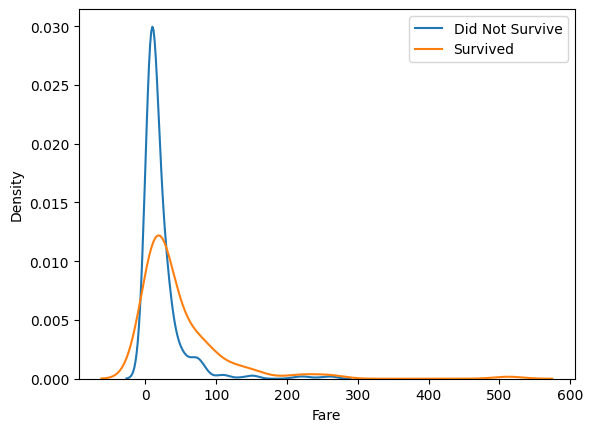

In [13]:
#Creating a KDEplot to vizualise the relation between Age and Survival rate

sns.kdeplot(df['Fare'] [df['Survived'] == 0], label = 'Did Not Survive')
sns.kdeplot(df['Fare'] [df['Survived'] == 1], label = 'Survived')
plt.xlabel('Fare')
plt.legend()


<Axes: >

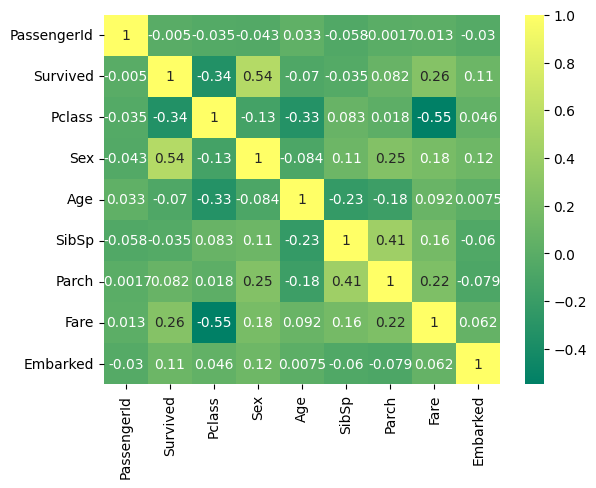

In [17]:
# Create a Heatmap to vizualise coorelations between the variables
sns.heatmap(df.corr(), annot=True,cmap='summer')

● What is the most important factor in determining survival of the Titanic incident?

According to the correlation from heatmap, and analysing the barplot and kdeplot, we can confirm that the PCclass, Age and Sex were important factors to indicate if a person would survive, showing that people who were on the first classes had greater chance to survive, as well as female passagenrs and children.


● In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Yes, according do the heatmap and the boxplot, passagers from 1st class had more probability to survive than 2nd and 3rd classes. Passagenrs from 2nd class had more chance to survive than those from 3rd class. 

● “Women and children first”. Was this the case?

Yes, according to the dataset and as we can see on the vizualisation shown on barplot Female passagers were prioritised as well as children (as it can be seen on the KDE plot).

● Add one other observation that you have noted in the dataset.

As the 1st class tickets were more expensive we can see a correlation between fare and survival rate too.
More the passagers paid more chances to survive they had. 


